# K-Nearest Neighbours Implementation

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
yp = pd.read_csv('cleaned_youngpeople_data.csv')

In [4]:
list(yp.columns)

['Music',
 'Slow songs or fast songs',
 'Dance',
 'Folk',
 'Country',
 'Classical music',
 'Musical',
 'Pop',
 'Rock',
 'Metal or Hardrock',
 'Punk',
 'Hiphop, Rap',
 'Reggae, Ska',
 'Swing, Jazz',
 'Rock n roll',
 'Alternative',
 'Latino',
 'Techno, Trance',
 'Opera',
 'Movies',
 'Horror',
 'Thriller',
 'Comedy',
 'Romantic',
 'Sci-fi',
 'War',
 'Fantasy/Fairy tales',
 'Animated',
 'Documentary',
 'Western',
 'Action',
 'History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'Internet',
 'PC',
 'Economy Management',
 'Biology',
 'Chemistry',
 'Reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Law',
 'Cars',
 'Art exhibitions',
 'Religion',
 'Countryside, outdoors',
 'Dancing',
 'Musical instruments',
 'Writing',
 'Passive sport',
 'Active sport',
 'Gardening',
 'Celebrities',
 'Shopping',
 'Science and technology',
 'Theatre',
 'Fun with friends',
 'Adrenaline sports',
 'Pets',
 'Flying',
 'Storm',
 'Darkness',
 'Heights',
 'Spiders',
 'Snakes',
 'Rats',
 'Agein

In [6]:
# We want to see if a person's phobias can predict whether they are a only child or not
phobias = yp[[
    'Flying',
    'Storm',
    'Darkness',
    'Heights',
    'Spiders',
    'Snakes',
    'Rats',
    'Ageing',
    'Dangerous dogs',
    'Fear of public speaking'
]]

yp = yp.replace(['no','yes'],[0,1])
only_child = yp['Only child']

# luckily, since all predictor variables have a range of 1-5, we don't need to scale (but this is v imp for KNN)

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking
0,1,1,1,1,1,5,3,1,3,2
1,1,1,1,2,1,1,1,3,1,4
2,1,1,1,1,1,1,1,1,1,2
3,2,1,1,3,5,5,5,4,5,5
4,1,2,1,1,1,1,2,2,4,3
...,...,...,...,...,...,...,...,...,...,...
972,1,2,4,5,2,2,2,3,3,4
973,1,1,1,1,1,1,1,2,5,5
974,2,1,3,2,2,2,1,1,1,5
975,2,3,2,5,3,3,3,3,5,5


In [40]:
# splitting into train & test sets 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(phobias, only_child, train_size = 0.8, random_state = 21)

print("X.shape:", phobias.shape)
print("X_train.shape:", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("")
print("y.shape:      ", only_child.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape: ", y_test.shape)
print("")

X_train

X.shape: (977, 10)
X_train.shape: (781, 10)
X_test.shape:  (196, 10)

y.shape:       (977,)
y_train.shape: (781,)
y_test.shape:  (196,)



,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking
165,1,1,1,1,1,1,1,3,1,1
76,1,1,1,1,3,3,3,5,3,4
575,2,1,1,5,1,1,1,1,3,5
242,3,3,1,5,1,3,2,2,5,3
346,1,1,1,5,5,1,1,3,1,2
...,...,...,...,...,...,...,...,...,...,...
48,3,1,2,2,2,3,3,5,3,1
772,3,2,1,2,1,1,1,2,1,2
824,3,4,1,2,5,1,1,3,2,4
207,3,1,1,1,1,1,1,5,3,1


In [41]:
# Performing KNN
from sklearn.neighbors import KNeighborsClassifier

# k = 3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

# testing the accuracy of the model
prediction = knn3.predict(X_test)
knn3.score(X_test, y_test)

0.6479591836734694

In [42]:
# k = 5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

# testing the accuracy of the model
prediction = knn5.predict(X_test)
knn5.score(X_test, y_test)

0.6683673469387755

In [43]:
# confusion matrices
from sklearn.metrics import confusion_matrix

print("K=3, confusion matrix:")
print(confusion_matrix(y_train, knn3.predict(X_train)))
print("")
print("K=5, confusion matrix:")
print(confusion_matrix(y_train, knn5.predict(X_train)))

K=3, confusion matrix:
[[548  39]
 [109  85]]

K=5, confusion matrix:
[[558  29]
 [140  54]]


In [44]:
# 5-fold cross-validation to find the best k

from sklearn.model_selection import cross_val_score

mean_fold_errors = []

# we want k < sqrt(977) - so approx less than 30
for num_neighbors in range(1, 30):
    np.random.seed(0)   # to ensure we use the same random folds

    knn = KNeighborsClassifier(num_neighbors)
    fold_errors = 1 - cross_val_score(knn, X_train, y_train, cv = 5)   # 5-fold CV
    mean_fold_errors.append(np.mean(fold_errors))

    print("")
    print("Num neighbors =", num_neighbors)
    print("K-fold CV errors:", np.round(fold_errors, 3))
    print("K-fold CV mean error:", np.round(mean_fold_errors[-1], 3))


Num neighbors = 1
K-fold CV errors: [0.325 0.481 0.404 0.346 0.468]
K-fold CV mean error: 0.405

Num neighbors = 2
K-fold CV errors: [0.255 0.314 0.263 0.263 0.288]
K-fold CV mean error: 0.277

Num neighbors = 3
K-fold CV errors: [0.318 0.378 0.353 0.308 0.372]
K-fold CV mean error: 0.346

Num neighbors = 4
K-fold CV errors: [0.274 0.295 0.276 0.256 0.269]
K-fold CV mean error: 0.274

Num neighbors = 5
K-fold CV errors: [0.318 0.314 0.301 0.263 0.308]
K-fold CV mean error: 0.301

Num neighbors = 6
K-fold CV errors: [0.293 0.276 0.25  0.263 0.263]
K-fold CV mean error: 0.269

Num neighbors = 7
K-fold CV errors: [0.293 0.295 0.276 0.288 0.276]
K-fold CV mean error: 0.286

Num neighbors = 8
K-fold CV errors: [0.261 0.276 0.256 0.256 0.269]
K-fold CV mean error: 0.264

Num neighbors = 9
K-fold CV errors: [0.299 0.282 0.263 0.269 0.288]
K-fold CV mean error: 0.28

Num neighbors = 10
K-fold CV errors: [0.268 0.282 0.25  0.256 0.25 ]
K-fold CV mean error: 0.261

Num neighbors = 11
K-fold CV 

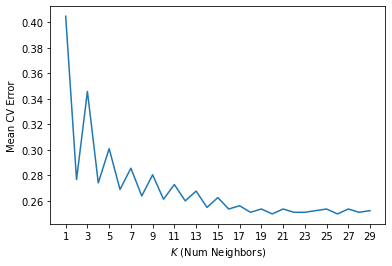

In [45]:
# plotting the error 
import matplotlib.pyplot as plt

plt.plot(range(1,30), mean_fold_errors)
plt.xticks(range(1, 30, 2))
plt.xlabel('$K$ (Num Neighbors)')
plt.ylabel('Mean CV Error')
plt.show()

In [ ]:
# error stabilizes when k = 23

In [46]:
# fitting the model with k = 23
knn23 = KNeighborsClassifier(n_neighbors=23)
knn23.fit(X_train, y_train)

# testing the accuracy of the model
prediction = knn23.predict(X_test)
knn23.score(X_test, y_test)

0.7397959183673469

Accuracy = 0.74
Recall = 0.00



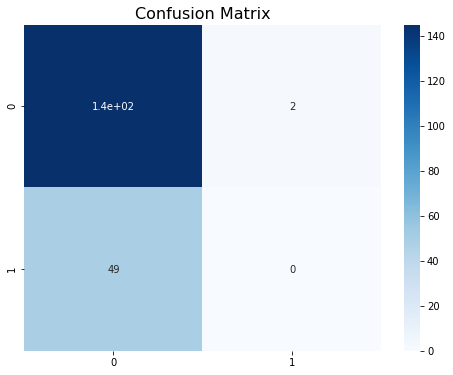

In [57]:
from sklearn.metrics import accuracy_score, recall_score
print(f'Accuracy = {accuracy_score(y_test, prediction):.2f}\nRecall = {recall_score(y_test, prediction):.2f}\n')
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [52]:
# How many are only children?
print(f'''% Only child in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Only child in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Only child in Train = 24.84
% Only child in Test  = 25.0


In [67]:
# Data is pretty imbalanced, so let's fix that by using Synthetic Minority Oversampling Technique (aka SMOTE)

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(phobias, only_child)

y_sm = pd.Series(y_sm)
X_sm = pd.DataFrame(X_sm, columns = [
    'Flying',
    'Storm',
    'Darkness',
    'Heights',
    'Spiders',
    'Snakes',
    'Rats',
    'Ageing',
    'Dangerous dogs',
    'Fear of public speaking'
])

print(f'''Shape of X before SMOTE: {phobias.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (977, 10)
Shape of X after SMOTE: (1468, 10)

Balance of positive and negative classes (%):


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    50.0
0    50.0
dtype: float64

In [69]:
# splitting into train & test sets 

X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, train_size = 0.8, random_state = 21)

print("X_sm.shape:", X_sm.shape)
print("X_sm_train.shape:", X_sm_train.shape)
print("X_sm_test.shape: ", X_sm_test.shape)
print("")
print("y_sm.shape:      ", y_sm.shape)
print("y_sm_train.shape:", y_sm_train.shape)
print("y_sm_test.shape: ", y_sm_test.shape)
print("")

X_sm.shape: (1468, 10)
X_sm_train.shape: (1174, 10)
X_sm_test.shape:  (294, 10)

y_sm.shape:       (1468,)
y_sm_train.shape: (1174,)
y_sm_test.shape:  (294,)



In [70]:
# k = 3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_sm_train, y_sm_train)

# testing the accuracy of the model
prediction = knn3.predict(X_sm_test)
knn3.score(X_sm_test, y_sm_test)

0.7074829931972789

In [73]:
# k = 5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_sm_train, y_sm_train)

# testing the accuracy of the model
prediction = knn5.predict(X_sm_test)
knn5.score(X_sm_test, y_sm_test)

0.7380952380952381

In [75]:
# confusion matrices

print("K=3, confusion matrix:")
print(confusion_matrix(y_sm_train, knn3.predict(X_sm_train)))
print("")
print("K=5, confusion matrix:")
print(confusion_matrix(y_sm_train, knn5.predict(X_sm_train)))

K=3, confusion matrix:
[[425 146]
 [ 22 581]]

K=5, confusion matrix:
[[375 196]
 [ 43 560]]


In [76]:
# 5-fold cross-validation to find the best k

mean_fold_errors = []

# we want k < sqrt(1468) - so approx less than 38
for num_neighbors in range(1, 38):
    np.random.seed(0)   # to ensure we use the same random folds

    knn = KNeighborsClassifier(num_neighbors)
    fold_errors = 1 - cross_val_score(knn, X_train, y_train, cv = 5)   # 5-fold CV
    mean_fold_errors.append(np.mean(fold_errors))

    print("")
    print("Num neighbors =", num_neighbors)
    print("K-fold CV errors:", np.round(fold_errors, 3))
    print("K-fold CV mean error:", np.round(mean_fold_errors[-1], 3))


Num neighbors = 1
K-fold CV errors: [0.325 0.481 0.404 0.346 0.468]
K-fold CV mean error: 0.405

Num neighbors = 2
K-fold CV errors: [0.255 0.314 0.263 0.263 0.288]
K-fold CV mean error: 0.277

Num neighbors = 3
K-fold CV errors: [0.318 0.378 0.353 0.308 0.372]
K-fold CV mean error: 0.346

Num neighbors = 4
K-fold CV errors: [0.274 0.295 0.276 0.256 0.269]
K-fold CV mean error: 0.274

Num neighbors = 5
K-fold CV errors: [0.318 0.314 0.301 0.263 0.308]
K-fold CV mean error: 0.301

Num neighbors = 6
K-fold CV errors: [0.293 0.276 0.25  0.263 0.263]
K-fold CV mean error: 0.269

Num neighbors = 7
K-fold CV errors: [0.293 0.295 0.276 0.288 0.276]
K-fold CV mean error: 0.286

Num neighbors = 8
K-fold CV errors: [0.261 0.276 0.256 0.256 0.269]
K-fold CV mean error: 0.264

Num neighbors = 9
K-fold CV errors: [0.299 0.282 0.263 0.269 0.288]
K-fold CV mean error: 0.28

Num neighbors = 10
K-fold CV errors: [0.268 0.282 0.25  0.256 0.25 ]
K-fold CV mean error: 0.261

Num neighbors = 11
K-fold CV 

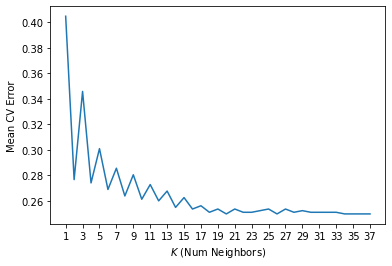

In [77]:
# plotting the error 

plt.plot(range(1,38), mean_fold_errors)
plt.xticks(range(1, 38, 2))
plt.xlabel('$K$ (Num Neighbors)')
plt.ylabel('Mean CV Error')
plt.show()

In [ ]:
# error stabilizes when k = 35

In [78]:
# fitting the model with k = 35
knn35 = KNeighborsClassifier(n_neighbors=35)
knn35.fit(X_sm_train, y_sm_train)

# testing the accuracy of the model
prediction = knn35.predict(X_sm_test)
knn35.score(X_sm_test, y_sm_test)

0.6054421768707483

Accuracy = 0.61
Recall = 0.87



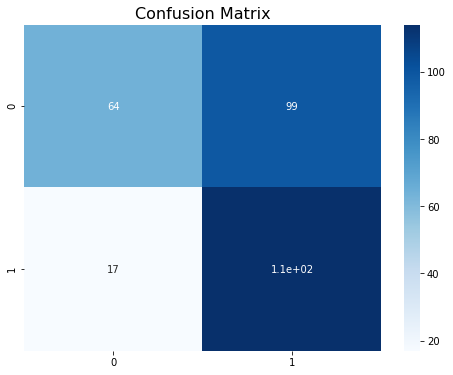

In [80]:
print(f'Accuracy = {accuracy_score(y_sm_test, prediction):.2f}\nRecall = {recall_score(y_sm_test, prediction):.2f}\n')
cm = confusion_matrix(y_sm_test, prediction)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');